# Working with NCBI Databases

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import subprocess

[Entrez Direct](https://www.ncbi.nlm.nih.gov/books/NBK179288/): E-utilities on the Unix Command Line.

The EDirect tool is a framework of various command line utilities that can be used to efficiently retrieve objects from biological databases. 

## Databases within the EDirect tool

In [2]:
!einfo -dbs

annotinfo
assembly
biocollections
bioproject
biosample
blastdbinfo
books
cdd
clinvar
dbvar
gap
gapplus
gds
gene
genome
geoprofiles
grasp
gtr
homologene
ipg
medgen
mesh
ncbisearch
nlmcatalog
nuccore
nucleotide
omim
orgtrack
pcassay
pccompound
pcsubstance
pmc
popset
protein
proteinclusters
protfam
pubmed
seqannot
snp
sra
structure
taxonomy


# einfo - information on fields and external links within databases

In [3]:
!einfo --help

einfo 15.5

Linux - x86_64

Database Selection

  -dbs       Print all database names
  -db        Database name (or "all")

Data Summaries

  -fields    Print field names
  -links     Print link names

Field Example

  <Field>
    <Name>ALL</Name>
    <FullName>All Fields</FullName>
    <Description>All terms from all searchable fields</Description>
    <TermCount>245340803</TermCount>
    <IsDate>N</IsDate>
    <IsNumerical>N</IsNumerical>
    <SingleToken>N</SingleToken>
    <Hierarchy>N</Hierarchy>
    <IsHidden>N</IsHidden>
    <IsTruncatable>Y</IsTruncatable>
    <IsRangable>N</IsRangable>
  </Field>

Link Example

  <Link>
    <Name>pubmed_protein</Name>
    <Menu>Protein Links</Menu>
    <Description>Published protein sequences</Description>
    <DbTo>protein</DbTo>
  </Link>
  <Link>
    <Name>pubmed_protein_refseq</Name>
    <Menu>Protein (RefSeq) Links</Menu>
    <Description>Link to Protein RefSeqs</Description>
    <DbTo>protein</DbTo>
  </Link>



In [4]:
!einfo -db protein -fields

ACCN	Accession
ALL	All Fields
ASSM	Assembly
AUTH	Author
BRD	Breed
CULT	Cultivar
DIV	Division
ECNO	EC/RN Number
FILT	Filter
FKEY	Feature key
GENE	Gene Name
GPRJ	BioProject
ISOL	Isolate
ISS	Issue
JOUR	Journal
KYWD	Keyword
MDAT	Modification Date
MLWT	Molecular Weight
ORGN	Organism
PACC	Primary Accession
PAGE	Page Number
PDAT	Publication Date
PORG	Primary Organism
PROP	Properties
PROT	Protein Name
SLEN	Sequence Length
SQID	SeqID String
STRN	Strain
SUBS	Substance Name
TITL	Title
UID	UID
VOL	Volume
WORD	Text Word


In [5]:
!einfo -db protein -links

nuccore_protein_wp	Links to autonomous proteins
protein_biocollections	BioCollections
protein_bioproject	BioProject Links
protein_biosystems	BioSystem Links
protein_ccds	ccds
protein_cdd	Conserved Domain Links
protein_cdd_concise_2	Concise Conserved Domain Links
protein_cdd_summary
protein_gene	Gene Links
protein_genome	Genome Links
protein_homologene	HomoloGene Links
protein_nuccore	Nucleotide Links
protein_nuccore_mat_peptide	Mature Peptides
protein_nuccore_mgc	Nucleotide NIH cDNA clone links
protein_nuccore_mrna	Encoding mRNA
protein_nuccore_small_genome	Link to all nucleotide sequences from this genome
protein_nuccore_tsa	TSA master records
protein_nuccore_wgs
protein_nuccore_wp	Link to genomic records
protein_nucgss	GSS Links
protein_nucleotide_mgc_url
protein_omim	OMIM Links
protein_pcassay_target	BioAssay by Target (List)
protein_pcassay_target_pig	BioAssay by Target (Identical Proteins, List)
protein_pcassay_target_pig_summary	pcassay
protein_pcassay_target_summary	pcassay
prot

## Searching paper in pubmed with the esearch program

In [91]:
!einfo -db pubmed -fields

AFFL	Affiliation
ALL	All Fields
AUCL	Author Cluster ID
AUID	Author - Identifier
AUTH	Author
BOOK	Book
CDAT	Date - Completion
CNTY	Place of Publication
COIS	Conflict of Interest Statements
COLN	Author - Corporate
CRDT	Date - Create
DSO	DSO
ECNO	EC/RN Number
ED	Editor
EDAT	Date - Entrez
EID	Extended PMID
EPDT	Electronic Publication Date
FAUT	Author - First
FILT	Filter
FINV	Investigator - Full
FULL	Author - Full
GRNT	Grant Number
INVR	Investigator
ISBN	ISBN
ISS	Issue
JOUR	Journal
LANG	Language
LAUT	Author - Last
LID	Location ID
MAJR	MeSH Major Topic
MDAT	Date - Modification
MESH	MeSH Terms
MHDA	Date - MeSH
OTRM	Other Term
PAGE	Pagination
PAPX	Pharmacological Action
PDAT	Date - Publication
PID	Publisher ID
PPDT	Print Publication Date
PS	Subject - Personal Name
PTYP	Publication Type
PUBN	Publisher
SI	Secondary Source ID
SUBH	MeSH Subheading
SUBS	Supplementary Concept
TIAB	Title/Abstract
TITL	Title
TT	Transliterated Title
UID	UID
VOL	Volume
WORD	Text Word


In [5]:
!esearch -db pubmed -query "Cyanobacteria [ORGN] AND review [PT] AND 2021:2022 [DP]"

<ENTREZ_DIRECT>
  <Db>pubmed</Db>
  <WebEnv>MCID_62541eb292ab591ff04101d1</WebEnv>
  <QueryKey>1</QueryKey>
  <Count>294</Count>
  <Step>1</Step>
</ENTREZ_DIRECT>


# Piping the output to other EDirect tools

We can redirect the results of the *esearch* program to other programs of the EDirect toolsuite with the unix pipe | symbol. This allows us to create 

In [7]:
!esearch -db pubmed -query "Cyanobacteria AND review [PT] AND 2021:2022 [DP]" | efetch -format docsum | xtract -pattern DocumentSummary -sep '\t' -element Id PubDate Source Author Title ELocationID > ../data/entrez/paper.txt

In [92]:
cols = ['Id','PubDate','Source','Title','ElocationID']
paper = pd.read_table('../data/entrez/paper.txt',header=None)
paper.columns = cols
paper.head()

,Id,PubDate,Source,Title,ElocationID
0,35387198,2022,Front Nutr,Microalgae Bioactive Carbohydrates as a Novel ...,doi: 10.3389/fnut.2022.806692
1,35384538,2022 Apr 6,Environ Sci Pollut Res Int,A review of plant-based coagulants for turbidi...,doi: 10.1007/s11356-022-20036-0
2,35372310,2022,Front Bioeng Biotechnol,Synthetic Biology Approaches for Improving Che...,doi: 10.3389/fbioe.2022.869195
3,35360501,2022 May,Saudi J Biol Sci,Algae as Bio-fertilizers: Between current situ...,doi: 10.1016/j.sjbs.2022.03.020
4,35347882,2022 Mar,Physiol Rep,The strange history of atmospheric oxygen.,doi: 10.14814/phy2.15214


In [9]:
len(paper)

294

In [93]:
paper.to_html('../data/entrez/cyano_revies.html')

# Why using query field tags?

Query terms in esearch or efilter can be qualified by entering an indexed field abbreviation in brackets. Boolean operators and parentheses can also be used in the query expression for more complex searches.

In [11]:
!einfo -db pubmed -fields

AFFL	Affiliation
ALL	All Fields
AUCL	Author Cluster ID
AUID	Author - Identifier
AUTH	Author
BOOK	Book
CDAT	Date - Completion
CNTY	Place of Publication
COIS	Conflict of Interest Statements
COLN	Author - Corporate
CRDT	Date - Create
DSO	DSO
ECNO	EC/RN Number
ED	Editor
EDAT	Date - Entrez
EID	Extended PMID
EPDT	Electronic Publication Date
FAUT	Author - First
FILT	Filter
FINV	Investigator - Full
FULL	Author - Full
GRNT	Grant Number
INVR	Investigator
ISBN	ISBN
ISS	Issue
JOUR	Journal
LANG	Language
LAUT	Author - Last
LID	Location ID
MAJR	MeSH Major Topic
MDAT	Date - Modification
MESH	MeSH Terms
MHDA	Date - MeSH
OTRM	Other Term
PAGE	Pagination
PAPX	Pharmacological Action
PDAT	Date - Publication
PID	Publisher ID
PPDT	Print Publication Date
PS	Subject - Personal Name
PTYP	Publication Type
PUBN	Publisher
SI	Secondary Source ID
SUBH	MeSH Subheading
SUBS	Supplementary Concept
TIAB	Title/Abstract
TITL	Title
TT	Transliterated Title
UID	UID
VOL	Volume
WORD	Text Word


In [12]:
!esearch -db pubmed -query "cyanobacteria AND EPS" | efetch -format docsum | xtract -pattern DocumentSummary -sep '\t' -element Id PubDate Source Author Title ELocationID > ../data/entrez/eps_cyanobacteria_wfields.txt

In [16]:
cols = ['Id','PubDate','Source','Title','ElocationID']
paper_without_fields = pd.read_table('../data/entrez/eps_cyanobacteria_wfields.txt',header=None)
paper_without_fields.columns = cols
paper_without_fields.head()

,Id,PubDate,Source,Title,ElocationID
0,35395308,2022 Apr 5,Sci Total Environ,Response of antibiotic resistance genes and mi...,doi: 10.1016/j.scitotenv.2022.155062
1,35217162,2022 Apr,Bioresour Technol,Insights into the microalgae-bacteria consorti...,doi: 10.1016/j.biortech.2022.126892
2,35176992,2022 Feb 17,BMC Microbiol,Metal removal capability of two cyanobacterial...,doi: 10.1186/s12866-022-02471-8
3,35144061,2022 Apr 15,J Environ Manage,Effects of accumulated cyanobacterial bloom bi...,doi: 10.1016/j.jenvman.2022.114644
4,34833074,2021 Nov 6,Life (Basel),CRISPRi as a Tool to Repress Multiple Copies o...,pii: 1198. doi: 10.3390/life11111198


In [17]:
len(paper_without_fields)

257

In [27]:
!einfo -db pubmed -fields

AFFL	Affiliation
ALL	All Fields
AUCL	Author Cluster ID
AUID	Author - Identifier
AUTH	Author
BOOK	Book
CDAT	Date - Completion
CNTY	Place of Publication
COIS	Conflict of Interest Statements
COLN	Author - Corporate
CRDT	Date - Create
DSO	DSO
ECNO	EC/RN Number
ED	Editor
EDAT	Date - Entrez
EID	Extended PMID
EPDT	Electronic Publication Date
FAUT	Author - First
FILT	Filter
FINV	Investigator - Full
FULL	Author - Full
GRNT	Grant Number
INVR	Investigator
ISBN	ISBN
ISS	Issue
JOUR	Journal
LANG	Language
LAUT	Author - Last
LID	Location ID
MAJR	MeSH Major Topic
MDAT	Date - Modification
MESH	MeSH Terms
MHDA	Date - MeSH
OTRM	Other Term
PAGE	Pagination
PAPX	Pharmacological Action
PDAT	Date - Publication
PID	Publisher ID
PPDT	Print Publication Date
PS	Subject - Personal Name
PTYP	Publication Type
PUBN	Publisher
SI	Secondary Source ID
SUBH	MeSH Subheading
SUBS	Supplementary Concept
TIAB	Title/Abstract
TITL	Title
TT	Transliterated Title
UID	UID
VOL	Volume
WORD	Text Word


In [18]:
!esearch -db pubmed -query "cyanobacteria [TIAB] AND EPS [TIAB:WORD]" | efetch -format docsum | xtract -pattern DocumentSummary -sep '\t' -element Id PubDate Source Author Title ELocationID > ../data/entrez/eps_cyanobacteria.txt

In [19]:
cols = ['Id','PubDate','Source','Title','ElocationID']
paper_with_fields = pd.read_table('../data/entrez/eps_cyanobacteria.txt',header=None)
paper_with_fields.columns = cols
paper_with_fields.head()

,Id,PubDate,Source,Title,ElocationID
0,35395308,2022 Apr 5,Sci Total Environ,Response of antibiotic resistance genes and mi...,doi: 10.1016/j.scitotenv.2022.155062
1,35217162,2022 Apr,Bioresour Technol,Insights into the microalgae-bacteria consorti...,doi: 10.1016/j.biortech.2022.126892
2,35176992,2022 Feb 17,BMC Microbiol,Metal removal capability of two cyanobacterial...,doi: 10.1186/s12866-022-02471-8
3,34833074,2021 Nov 6,Life (Basel),CRISPRi as a Tool to Repress Multiple Copies o...,pii: 1198. doi: 10.3390/life11111198
4,34823807,2022 Jan 15,Carbohydr Polym,Lactylated acidic exopolysaccharide produced b...,doi: 10.1016/j.carbpol.2021.118801


In [20]:
print("[*] reduce the result number by using additional search field tags!")
print("\t[*] From {} to {} paper ...".format(len(paper_without_fields),len(paper_with_fields)))

[*] reduce the result number by using additional search field tags!
	[*] From 257 to 159 paper ...


## Linking pubmed queries

With the *elink* tool we can link the resulting esearch output of one database to another database.

In [13]:
%%bash

esearch -db pubmed -query "cyanobacteria [TIAB] AND lichen [TIAB] AND symbiosis [TIAB:WORD]" | 
elink -target protein | 
efilter -organism Nostoc | 
efetch -format fasta > ../data/entrez/nostoc_symbiosis_proteins.faa

In [14]:
with open("../data/entrez/nostoc_symbiosis_proteins.faa","r") as fasta:
    proteins = {}
    for line in fasta.readlines():
        if line.startswith(">"):
            header = line.rstrip()
            proteins[header] = []
        else:
            proteins[header].append(line.rstrip())

In [15]:
print("[*] {} proteins have been identified".format(len(proteins.keys())))

[*] 197 proteins have been identified


In [69]:
!einfo -db protein -fields

ACCN	Accession
ALL	All Fields
ASSM	Assembly
AUTH	Author
BRD	Breed
CULT	Cultivar
DIV	Division
ECNO	EC/RN Number
FILT	Filter
FKEY	Feature key
GENE	Gene Name
GPRJ	BioProject
ISOL	Isolate
ISS	Issue
JOUR	Journal
KYWD	Keyword
MDAT	Modification Date
MLWT	Molecular Weight
ORGN	Organism
PACC	Primary Accession
PAGE	Page Number
PDAT	Publication Date
PORG	Primary Organism
PROP	Properties
PROT	Protein Name
SLEN	Sequence Length
SQID	SeqID String
STRN	Strain
SUBS	Substance Name
TITL	Title
UID	UID
VOL	Volume
WORD	Text Word


In [19]:
!esearch -db protein -query "Synechococcus elongatus [ORGN] AND crispr [WORD]" | efetch -format fasta > ../data/entrez/cyano_crispr_proteins.faa

In [17]:
def parse_protein_fasta(filePath):
    with open(filePath,"r") as fasta:
        proteins = {}
        for line in fasta.readlines():
            if line.startswith(">"):
                header = line.rstrip()
                identifier = header.split(" ")[0].split(">")[1]
                proteins[identifier] = [header]
            else:
                proteins[identifier].append(line.rstrip())
    return proteins

In [20]:
proteins = parse_protein_fasta("../data/entrez/cyano_crispr_proteins.faa")
for header in proteins.keys():
    print(proteins[header][0])

>WP_208678746.1 PD-(D/E)XK nuclease family protein [Synechococcus elongatus]
>WP_208676015.1 PD-(D/E)XK nuclease family protein [Synechococcus elongatus]
>WP_208676431.1 mCpol domain-containing protein [Synechococcus elongatus]
>QFZ93340.1 ATP-dependent helicase [Synechococcus elongatus PCC 11802]
>QFZ91794.1 PD-(D/E)XK nuclease family protein [Synechococcus elongatus PCC 11802]
>WP_126148382.1 CRISPR-associated endonuclease Cas2 [Synechococcus elongatus]
>WP_126148401.1 type I-MYXAN CRISPR-associated protein Cas5/Cmx5/DevS [Synechococcus elongatus]
>AZB72307.1 hypothetical protein DOP62_05850 [Synechococcus elongatus PCC 11801]
>AZB72111.1 PD-(D/E)XK nuclease family protein [Synechococcus elongatus PCC 11801]
>BAD78381.1 unknown protein [Synechococcus elongatus PCC 6301]


In [22]:
!esearch -db protein -query "WP_208678746.1,WP_126148382.1" | elink -target protfam | efetch -format docsum | xtract -pattern DocumentSummary -sep '\t' -element Id DispProductName/string DispFamilyAcc 

332908	PD-(D/E)XK nuclease family protein	NF024117.2
332121	CRISPR associated protein Cas2	NF021356.2
317665	Dna2/Cas4 domain-containing protein	NF014040.2
214769	CRISPR-associated endonuclease Cas2	10561374
142020	CRISPR-associated endonuclease Cas2	TIGR01573.1


In [23]:
!esearch -db protein -query "WP_208678746.1,WP_126148382.1" | elink -target protfam | efetch -format url

https://www.ncbi.nlm.nih.gov/protfam/332908,332121,317665,214769,142020


In [ ]:
!esearch -db protein -query "WP_208678746.1,WP_126148382.1" | elink -target cdd | efetch -format url

In [94]:
!einfo -db protein -links

nuccore_protein_wp	Links to autonomous proteins
protein_biocollections	BioCollections
protein_bioproject	BioProject Links
protein_biosystems	BioSystem Links
protein_ccds	ccds
protein_cdd	Conserved Domain Links
protein_cdd_concise_2	Concise Conserved Domain Links
protein_cdd_summary
protein_gene	Gene Links
protein_genome	Genome Links
protein_homologene	HomoloGene Links
protein_nuccore	Nucleotide Links
protein_nuccore_mat_peptide	Mature Peptides
protein_nuccore_mgc	Nucleotide NIH cDNA clone links
protein_nuccore_mrna	Encoding mRNA
protein_nuccore_small_genome	Link to all nucleotide sequences from this genome
protein_nuccore_tsa	TSA master records
protein_nuccore_wgs
protein_nuccore_wp	Link to genomic records
protein_nucgss	GSS Links
protein_nucleotide_mgc_url
protein_omim	OMIM Links
protein_pcassay_target	BioAssay by Target (List)
protein_pcassay_target_pig	BioAssay by Target (Identical Proteins, List)
protein_pcassay_target_pig_summary	pcassay
protein_pcassay_target_summary	pcassay
prot

In [37]:
!esearch -db protein -query "WP_208678746.1,WP_126148382.1" | elink -target protein -name protein_cdd | efetch -format url

https://www.ncbi.nlm.nih.gov/protein/224262


In [39]:
!esearch -db protein -query "WP_208678746.1,WP_126148382.1" | elink -target pubmed | efetch -format url

https://www.ncbi.nlm.nih.gov/pubmed/22942283,18482976,15972856,11952905


In [40]:
!esearch -db protein -query "synechococcus elongatus [ORGN] AND (lipopolysaccharide [WORD] OR LPS [WORD])" | elink -target cdd | efetch -format url

https://www.ncbi.nlm.nih.gov/cdd/422966,422963,421818,419721,419666,418437,416254,415824,414207,412952,412208,412191,411600,411426,411078,407701,403877,400725,399668,399366,398545,398346,397871,397148,397147,397146,396805,396773,395897,395853,395641,395387,395230,395081,394964,379351,355385,340821,340819,319746,279798,275202,275199,274908,274744,274656,274516,274398,274396,274390
https://www.ncbi.nlm.nih.gov/cdd/274331,274026,273834,273530,273491,273482,273363,273362,273361,273184,240375,240339,240328,240327,238922,238921,238920,238919,238918,238917,238916,238915,238914,238912,238579,238578,238577,238574,238573,238572,238570,238177,237917,237894,237727,237689,237688,237687,237686,237685,237672,237671,237670,237652,237651,237650,237649,237648,237647,237646
https://www.ncbi.nlm.nih.gov/cdd/237645,237457,237456,237455,237454,237453,237452,237451,237422,237421,237420,237419,237376,237105,236997,236996,236992,236947,236898,236870,236865,236863,236861,236858,236755,236729,236707,236703,23668

In [7]:
!esearch -db protein -query "synechococcus elongatus [ORGN] AND (lipopolysaccharide OR LPS)" | elink -related -name protein_cdd_summary | efetch -format url

https://www.ncbi.nlm.nih.gov/protein/133010,400725,133053,133051,133048,133047,133041,133026,133021,133018,133015,133006,133002,132996,130256,131681,133065,133052,131256,133025,133009,215133,182906,182336,215640,213263,213237,213235,213220,213202,213198,213192,213185,213183,213181,213179,185067,184200,183080,183056,181965,172739,237457,215558,213265,213261,213259,213231,213229,213218
https://www.ncbi.nlm.nih.gov/protein/213216,213214,213212,213196,213190,213188,184214,184125,184028,184021,183231,183085,182592,182569,182561,182528,182221,181906,181535,178320,172795,172762,172751,172749,172747,172743,172741,172730,172030,215443,215195,172734,213226,213224,213222,240328,237894,237652,237651,236997,240327,238912,237420,237419,184210,215495,215493,215387,213269,213267
https://www.ncbi.nlm.nih.gov/protein/184642,397148,399668,395230,395081,100093,395387,100042,225149,225059,224060,224055,224054,224053,224026,224008,223928,223598,223562,223521,227590,227321,227118,227093,227019,226970,226969,

In [123]:
!esearch -db protein -query "WP_208678746.1 WP_208676015.1" | efetch -format gp > ../data/entrez/genbankfiles.gp

In [42]:
!efetch -db protein -id "WP_208678746.1 WP_208676015.1" -format fasta

>WP_208678746.1 PD-(D/E)XK nuclease family protein [Synechococcus elongatus]
MSRYPALSQGTLQRLQDCPRLFQVEALELSSRWFQHDLRQRLDWGRRFHRLMQQQALGIAIEQLQTGDRS
LDQCLADFAEAQPQLFVPPPAGWHRQTECRWQWPFQDFVLVAIFDRLELSDRAAQIHDWKTHNRPQTLET
LAASWQTQLYCWLVTERSGLPPESVAMHYWFVRSQPQKPVTIHWNQQQHQQTQQRLERSLQELKGWLQDY
PQTPLPQRPDRNERCQTCEERDRCWPPTPSAAAIASWDEIPVVEL
>WP_208676015.1 PD-(D/E)XK nuclease family protein [Synechococcus elongatus]
MSRYPALSQGTLQRLQDCPRLFQVEALELSSRWFQHDLRQRLDWGRRFHRLMQQQALGIAIEQMQTGDRS
LDQCLADFAEAQPQLFVPPPAGWHRQTECRWQWPFQDFVLVAIFDRLELSDRAAQIHDWKTHNRPQTLET
LAASWQTQLYCWLVTERSGLPPESVAMHYWFVLSQPQKPVTIHWNRQQHQQTQQRLERSLQELKGWLQDY
PQTPLPQRPDRNERCQTCEERDRCWPPTPSAAAIASWDEIPVVEL


In [43]:
!efetch -db protein -id "WP_208678746.1 WP_208676015.1" -format gp

LOCUS       WP_208678746             255 aa            linear   BCT 05-AUG-2021
DEFINITION  PD-(D/E)XK nuclease family protein [Synechococcus elongatus].
ACCESSION   WP_208678746
VERSION     WP_208678746.1
KEYWORDS    RefSeq.
SOURCE      Synechococcus elongatus
  ORGANISM  Synechococcus elongatus
            Bacteria; Cyanobacteria; Synechococcales; Synechococcaceae;
            Synechococcus.
REFERENCE   1  (residues 1 to 255)
  AUTHORS   Kinch,L.N., Ginalski,K., Rychlewski,L. and Grishin,N.V.
  TITLE     Identification of novel restriction endonuclease-like fold families
            among hypothetical proteins
  JOURNAL   Nucleic Acids Res 33 (11), 3598-3605 (2005)
   PUBMED   15972856
  REMARK    Publication Status: Online-Only
COMMENT     REFSEQ: This record represents a single, non-redundant, protein
            sequence which may be annotated on many different RefSeq genomes
            from the same, or different, species.
            
            ##Evidence-For-Name-Assignment-

## Gene Expression Omnibus

This database stores individual gene expression profiles from curated DataSets in the Gene Expression Omnibus (GEO) repository.

In [15]:
!einfo -db geoprofiles -fields

ACCN	GEO Accession
ALL	All Fields
ATYP	Annotation Type
CHR	Chromosome
CPOS	Base Position
FILT	Filter
FINF	Flag Information
FTYP	Flag Type
GDSC	Gene Description
GDST	GDS Text
GEOT	GEO Description/Title Text
GI	GI
GO	Gene Ontology
GTYP	DataSet Type
ID	ID_REF
NAME	Reporter Identifier
NSAM	Number of Samples
ORGN	Organism
RMAX	Max Value Rank
RMIN	Min Value Rank
RSTD	Ranked Standard Deviation
RTYP	Platform Reporter Type
SRC	Sample Source
SYMB	Gene Symbol
UID	UID
VTYP	Sample Value Type


In [51]:
#time consuming query!
!esearch -db geoprofiles -query "Cyanobacteria [ORGN] AND stress" | efetch -format docsum | xtract -pattern DocumentSummary -sep '\t' -element Id GDS GPL valType taxon title > ../data/entrez/geo_profiles.txt  

In [52]:
cols = ['Id','GDS','GPL','valType','taxon','title']
geo_profiles = pd.read_table('../data/entrez/geo_profiles.txt',header=None)
geo_profiles.columns = cols
geo_profiles.head()

,Id,GDS,GPL,valType,taxon,title
0,66582060,3745,7016,log2 ratio,Synechocystis sp. PCC 6803,Sulfur deprivation effect on cyanobacterium Sy...
1,66582046,3745,7016,log2 ratio,Synechocystis sp. PCC 6803,Sulfur deprivation effect on cyanobacterium Sy...
2,66582045,3745,7016,log2 ratio,Synechocystis sp. PCC 6803,Sulfur deprivation effect on cyanobacterium Sy...
3,66582044,3745,7016,log2 ratio,Synechocystis sp. PCC 6803,Sulfur deprivation effect on cyanobacterium Sy...
4,66582023,3745,7016,log2 ratio,Synechocystis sp. PCC 6803,Sulfur deprivation effect on cyanobacterium Sy...


In [53]:
len(geo_profiles)

21659

In [47]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to drop duplicates in pla

In [54]:
geo_profiles = geo_profiles.drop_duplicates(subset=["title"])

In [55]:
geo_profiles.head()

,Id,GDS,GPL,valType,taxon,title
0,66582060,3745,7016,log2 ratio,Synechocystis sp. PCC 6803,Sulfur deprivation effect on cyanobacterium Sy...
191,66574663,3744,8567,count,Synechocystis sp. PCC 6803,Cyanobacterium Synechocystis culture response ...
1114,66532250,3743,3214,log2 ratio,Synechocystis sp. PCC 6803,Iron depletion effect on cyanobacterium Synech...
4064,66529150,3742,3214,log2 ratio,Synechocystis sp. PCC 6803,Zinc excess effect on cyanobacterium Synechocy...
7014,66526050,3741,3214,log2 ratio,Synechocystis sp. PCC 6803,Iron excess effect on cyanobacterium Synechocy...


In [56]:
print("[*] Number of profiles in data table: {}".format(len(geo_profiles)))

[*] Number of profiles in data table: 9


In [62]:
geo_profiles.to_html("../data/entrez/geo_profiles.html")

In [60]:
%%bash

esearch -db geoprofiles -query "Cyanobacteria [ORGN] AND stress" | 
elink -target gds | 
efetch -format docsum |
xtract -pattern DocumentSummary -sep "\t" -element Id valType taxon PDAT title summary > ../data/entrez/gds_output.tsv

In [63]:
cols = ['Id','valType','taxon','PDAT','title','summary']
geo_profiles = pd.read_table('../data/entrez/gds_output.tsv', header=None, delimiter="\t")
geo_profiles.columns = cols
geo_profiles.head()

,Id,valType,taxon,PDAT,title,summary
0,3744,count,Synechocystis sp. PCC 6803,2009/05/20,Cyanobacterium Synechocystis culture response ...,Analysis of cyanobacterium cultures subjected ...
1,3745,log2 ratio,Synechocystis sp. PCC 6803,2008/07/24,Sulfur deprivation effect on cyanobacterium Sy...,Analysis of cyanobacterium cultures grown unde...
2,3738,log2 ratio,Synechocystis sp. PCC 6803,2006/09/04,UV-irradiation effect on cyanobacterium Synech...,Analysis of cyanobacterium cultures subjected ...
3,3737,log2 ratio,Synechocystis sp. PCC 6803,2006/09/04,Dehydration effect on cyanobacterium Synechocy...,Analysis of cyanobacterium cultures subjected ...
4,3743,log2 ratio,Synechocystis sp. PCC 6803,2005/12/07,Iron depletion effect on cyanobacterium Synech...,Analysis of cyanobacterium cultures subjected ...


In [64]:
for summ in geo_profiles.summary:
    print("[*] "+summ+"\n")

[*] Analysis of cyanobacterium cultures subjected to various stressful growth conditions: CO2 depletion, dark, and high light. Results provide insight into molecular mechanisms, including antisense (as)RNAs and non-coding (nc)RNAs, underlying cyanobacteria adaptation to various stresses.

[*] Analysis of cyanobacterium cultures grown under sulfur starvation conditions for up to 72 hrs. During S limitation, production of hydrogen, a clean and sustainable energy carrier, increases substantially. Results provide insight into gene expression changes during the transition to S starvation.

[*] Analysis of cyanobacterium cultures subjected to UV stress. UV irradiation and desiccation stresses often co-occur in natural environments, making their combined effects important selective factors within microbial populations. Results compared to those from cultures subjected to desiccation stress.

[*] Analysis of cyanobacterium cultures subjected to desiccation stress. UV irradiation and desiccatio

In [61]:
%%bash

esearch -db geoprofiles -query "Escherichia coli[ORGN] AND lipopolysaccharide" | 
elink -target gds | 
efetch -format url 

https://www.ncbi.nlm.nih.gov/gds/5163,5162,5160,4321,4815,3597,3421,3123,2879,2825,2753,2427,2768,2364,2181,1827,1963,2600,2599,2598,2597,2596,2595,2594,2593,2592,2591,2590,2589,2588,2587,2586,2585,2584,2583,2582,2581,2580,2579,2578,1804,1494,1400,1399,1099,680,1848,100,99,96
https://www.ncbi.nlm.nih.gov/gds/95


In [66]:
#%%bash
#
#esearch -db gds -query "Synechocystis sp. PCC 6803 [ORGN] AND stress [GDST:GEOT]" |
#efetch -format docsum |
#xtract -pattern DocumentSummary -sep '\t' -element Id title summary taxon gdsType PDAT Samples/Sample

In [21]:
!einfo -db sra -fields

ACCN	Accession
ACS	Access
ALL	All Fields
ALN	Aligned
AUTH	Author
BSPL	BioSample
FILT	Filter
GPRJ	BioProject
LAY	Layout
MBS	Mbases
MDAT	Modification Date
ORGN	Organism
PDAT	Publication Date
PLAT	Platform
PROP	Properties
RLEN	ReadLength
SEL	Selection
SRC	Source
STRA	Strategy
TITL	Title
UID	UID
WORD	Text Word


In [94]:
%%bash

esearch -db sra -query "lipopolysaccharide OR LPS AND proteobacteria [ORGN]" | efetch -format docsum -stop 20 | 
xtract -pattern DocumentSummary -sep '\t' -element Runs/Run@acc

SRR9994135
SRR9994134
SRR9994133
SRR9994132
SRR9994131
SRR9994130
SRR9962839
SRR9962840
SRR9962841
SRR9962842
SRR9962843
SRR9962844
SRR9962845
SRR9962846
SRR9962847
SRR9962848
SRR8909455
SRR8909493
SRR8909199
SRR8909221


In [3]:
!einfo -db sra -links

sra_assembly	Assembly Links
sra_bioproject	BioProject Links
sra_bioproject_sp	bioproject
sra_biosample	BioSample Links
sra_gap_all	dbGaP Links
sra_gds	GEO DataSet Links
sra_genome	genome
sra_nuccore	Nucleotide Links
sra_nuccore_wgs	WGS links
sra_omim	Omim links
sra_pmc	PMC
sra_pubmed	PubMed Links
sra_taxonomy	Taxonomy Links


# Searching Sequence Targets 

In [67]:
%%bash

esearch -db protein -query "lipopolysaccharide AND synthesis AND burkholderia [ORGN]" | 
efetch -format fasta > ../data/entrez/lipopolysacchairdes_burkholderia.faa

In [81]:
proteins = parse_protein_fasta('../data/entrez/lipopolysacchairdes_burkholderia.faa')

In [82]:
print("[*] length of target proteins: ",len(proteins))

[*] length of target proteins:  72


In [68]:
%%bash

esearch -db protein -query "(LPS OR lipopolysaccharides OR lipopolysaccharide) AND (transcriptional activator OR transcription factor) AND proteobacteria [ORGN]" |
efetch -format fasta > ../data/entrez/lps_transcription_factors.faa

In [78]:
proteins = parse_protein_fasta('../data/entrez/lps_transcription_factors.faa')

In [80]:
print("[*] length of target proteins: ",len(proteins))

[*] length of target proteins:  3447


In [58]:
!blastp -help

USAGE
  blastp [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-ipglist filename]
    [-negative_ipglist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-qcov_hsp_perc float_value] [-max_hsps int_value]
    [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value] [-seg SEG_options]
    [-soft_masking soft_masking] [-matrix matrix_name]
    [-threshold float_value] [-c

In [76]:
#time consuming blastp due to 3447 protein sequences --> ~5 min.
#!blastp -db ../data/databases/other_symbionts/HYDRA_OTHER_LAB_SYMBIONTS.database -query ../data/entrez/lps_transcription_factors.faa -outfmt 6 -out ../data/entrez/lps_transcription_factors_blast.table

In [77]:
blast_table = pd.read_table("../data/entrez/lps_transcription_factors_blast.table")
columns = ['qaccession','saccesion','pident','alignment length','mismatches','gap opens','q. start','q. end','s. start','s. end', 'evalue','bit score']
blast_table.columns = columns
blast_table.head()

,qaccession,saccesion,pident,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,WP_207886700.1,C1-1_S10_00914,29.333,75,46,4,48,117,80,152,0.002,36.6
1,WP_207886700.1,WP_087495290.1,24.000,125,77,5,4,110,19,143,0.005,35.4
2,WP_207886700.1,AEP2-2_S9_04483,26.027,73,51,2,48,117,78,150,0.017,33.9
3,WP_207886700.1,C1-2_S1_00310,25.000,76,50,3,48,118,86,159,0.054,32.3
4,WP_207886700.1,AEP2-2_S9_04536,33.333,66,37,3,14,79,128,186,0.120,31.6


In [87]:
print("[*] The blast algorithm resulted in {} hits".format(len(blast_table['saccesion'])))

[*] The blast algorithm resulted in 244244 hits


In [88]:
blast_table.sort_values(by=['evalue'])

,qaccession,saccesion,pident,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
978,sp|P0AAB4.1|UBID_ECOLI,AEP1-4_S2_03899,67.677,495,152,2,4,490,1,495,0.0,689.0
863,sp|P0AAI3.1|FTSH_ECOLI,WP_087497052.1,63.953,602,211,2,7,604,11,610,0.0,793.0
977,sp|P0AAB4.1|UBID_ECOLI,C1-1_S10_02121,68.826,494,147,1,4,490,2,495,0.0,715.0
976,sp|P0AAB4.1|UBID_ECOLI,C1-2_S1_00992,70.648,494,138,1,4,490,1,494,0.0,738.0
867,sp|P0AAI3.1|FTSH_ECOLI,C1-2_S1_04797,60.320,625,233,5,7,624,10,626,0.0,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235256,CDQ15219.1,C1-1_S10_02788,27.907,43,31,0,138,180,146,188,10.0,26.2
171539,OZZ36234.1,AEP1-4_S2_01701,22.500,80,59,1,3,82,12,88,10.0,26.9
143776,OZZ55370.1,AEP1-4_S2_01701,22.500,80,59,1,3,82,12,88,10.0,26.9
19274,WP_123721048.1,AEP2-2_S9_02068,31.667,60,39,1,77,134,30,89,10.0,25.8


In [89]:
blast_table = blast_table[blast_table['evalue'] <= 0.0000001]
blast_table = blast_table[blast_table['bit score'] > 500]
blast_table

,qaccession,saccesion,pident,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
863,sp|P0AAI3.1|FTSH_ECOLI,WP_087497052.1,63.953,602,211,2,7,604,11,610,0.000000e+00,793.0
864,sp|P0AAI3.1|FTSH_ECOLI,AEP1-4_S2_02844,63.252,615,218,4,13,622,1,612,0.000000e+00,785.0
865,sp|P0AAI3.1|FTSH_ECOLI,C1-1_S10_01631,60.794,630,236,6,1,624,4,628,0.000000e+00,771.0
866,sp|P0AAI3.1|FTSH_ECOLI,AEP2-2_S9_04224,61.912,617,227,3,7,619,11,623,0.000000e+00,768.0
867,sp|P0AAI3.1|FTSH_ECOLI,C1-2_S1_04797,60.320,625,233,5,7,624,10,626,0.000000e+00,754.0
976,sp|P0AAB4.1|UBID_ECOLI,C1-2_S1_00992,70.648,494,138,1,4,490,1,494,0.000000e+00,738.0
977,sp|P0AAB4.1|UBID_ECOLI,C1-1_S10_02121,68.826,494,147,1,4,490,2,495,0.000000e+00,715.0
978,sp|P0AAB4.1|UBID_ECOLI,AEP1-4_S2_03899,67.677,495,152,2,4,490,1,495,0.000000e+00,689.0
979,sp|P0AAB4.1|UBID_ECOLI,AEP2-2_S9_03912,64.786,514,152,4,4,488,1,514,0.000000e+00,684.0
7566,WP_071237394.1,C1-2_S1_05090,38.901,928,551,7,1,921,1,919,0.000000e+00,660.0


In [90]:
print("[*] We successfully reduced our putative target sequences to {} sequences!".format(len(blast_table)))

[*] We successfully reduced our putative target sequences to 15 sequences!


# Use case: assembly database

In [2]:
directory = '../data/curvibacter_dna_genomes_for_rec_blast/'

In [3]:
%%bash

esearch -db assembly -query "Curvibacter [ORGN]" | 
efetch -format docsum | 
xtract -pattern DocumentSummary \
    -element Id AssemblyAccession AssemblyName AssemblyStatus SubmissionDate FtpPath_GenBank Taxid Organism SpeciesTaxid SpeciesName \
    > ../data/curvibacter_assemblies.table

In [6]:
cols = ['Id', 'AssemblyAccession', 'AssemblyName', 'AssemblyStatus', 'SubmissionDate','FtpPath_GenBank', 'Taxid', 'Organism', 'SpeciesTaxid', 'SpeciesName']
assemblies = pd.read_table('../data/curvibacter_assemblies.table',header=None)
assemblies.columns = cols
assemblies.head()

,Id,AssemblyAccession,AssemblyName,AssemblyStatus,SubmissionDate,FtpPath_GenBank,Taxid,Organism,SpeciesTaxid,SpeciesName
0,11312701,GCA_020621995.1,ASM2062199v1,Contig,2021/10/26 00:00,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020...,1888168,Curvibacter sp. (b-proteobacteria),1888168,Curvibacter sp.
1,11312681,GCA_020621965.1,ASM2062196v1,Scaffold,2021/10/26 00:00,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020...,1888168,Curvibacter sp. (b-proteobacteria),1888168,Curvibacter sp.
2,11068931,GCA_020248905.1,ASM2024890v1,Contig,2021/10/04 00:00,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020...,1888168,Curvibacter sp. (b-proteobacteria),1888168,Curvibacter sp.
3,10501171,GCA_019233055.1,ASM1923305v1,Contig,2021/07/15 00:00,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019...,1888168,Curvibacter sp. (b-proteobacteria),1888168,Curvibacter sp.
4,10449501,GCA_019163435.1,ASM1916343v1,Scaffold,2021/07/07 00:00,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019...,86182,Curvibacter lanceolatus (b-proteobacteria),86182,Curvibacter lanceolatus


In [7]:
organisms = assemblies['SpeciesTaxid'].unique()
print("[+] There are {} unique taxonomic identifier within the dataset".format(len(organisms)))

[+] There are 12 unique taxonomic identifier within the dataset


In [8]:
for species_name in assemblies['SpeciesName'].unique():
    print("[+] Found Curvibacter Species: {}".format(species_name))
    sub_df = assemblies[assemblies['SpeciesName'] == species_name]
    print("[*] \t There are {} unique assemblies in the {} Sub-Dataframe".format(len(sub_df), species_name))

[+] Found Curvibacter Species: Curvibacter sp.
[*] 	 There are 9 unique assemblies in the Curvibacter sp. Sub-Dataframe
[+] Found Curvibacter Species: Curvibacter lanceolatus
[*] 	 There are 2 unique assemblies in the Curvibacter lanceolatus Sub-Dataframe
[+] Found Curvibacter Species: Curvibacter sp. CHRR-16
[*] 	 There are 1 unique assemblies in the Curvibacter sp. CHRR-16 Sub-Dataframe
[+] Found Curvibacter Species: uncultured Curvibacter sp.
[*] 	 There are 11 unique assemblies in the uncultured Curvibacter sp. Sub-Dataframe
[+] Found Curvibacter Species: Curvibacter sp. PD_MW3
[*] 	 There are 1 unique assemblies in the Curvibacter sp. PD_MW3 Sub-Dataframe
[+] Found Curvibacter Species: Curvibacter sp. AEP1-3
[*] 	 There are 1 unique assemblies in the Curvibacter sp. AEP1-3 Sub-Dataframe
[+] Found Curvibacter Species: Curvibacter sp. GWA2_64_110
[*] 	 There are 1 unique assemblies in the Curvibacter sp. GWA2_64_110 Sub-Dataframe
[+] Found Curvibacter Species: Curvibacter sp. RIFCSP

In [9]:
print("[+] amount of curvibacter genomes in the assembly database: {}".format(len(assemblies)))
print("\t[+] {} genomes are labelled as complete genome".format((assemblies['AssemblyStatus'] == 'Complete Genome').sum()))
print("\t[+] {} genomes are labelled as chromosome".format((assemblies['AssemblyStatus'] == 'Chromosome').sum()))
print("\t[+] {} genomes are labelled as contig".format((assemblies['AssemblyStatus'] == 'Contig').sum()))
print("\t[+] {} genomes are labelled as scaffold".format((assemblies['AssemblyStatus'] == 'Scaffold').sum()))

[+] amount of curvibacter genomes in the assembly database: 31
	[+] 0 genomes are labelled as complete genome
	[+] 1 genomes are labelled as chromosome
	[+] 19 genomes are labelled as contig
	[+] 11 genomes are labelled as scaffold


In [20]:
len(assemblies['SpeciesTaxid'].unique())

12

In [10]:
transform_ftp_path = lambda file: file.split('/')[-1]

for file in assemblies['FtpPath_GenBank']:
    output = transform_ftp_path(file) + '_genomic.fna'
    file = file + '/' + transform_ftp_path(file) + '_genomic.fna.gz'
    print("[*] Working on file: {}".format(file))

    if(os.path.isfile(directory+output) == True):
        print("\t[+] File Already Exists\n")
    else:
        for attempt in range(10):

            try:
                print("\t[*] Executing subprocess")
                proc = subprocess.Popen("wget -qO- {} | gzip -d > {}".format(file,output),shell=True)
                returncode = proc.wait(timeout=500)
                if(returncode != 0):
                    raise Exception
            except Exception:
                print("\t[-] NEXT TRY of {} attempt {}".format(file,attempt))
                if(attempt == 2):
                    if(os.path.isfile(transform_ftp_path(file))):
                        os.remove(transform_ftp_path(file))
                    print("\t[-] SKIPPED DOWNLOADING")
            else:
                print("[+] SUCCESS : {}\n".format(output))
                break    

[*] Working on file: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/621/995/GCA_020621995.1_ASM2062199v1/GCA_020621995.1_ASM2062199v1_genomic.fna.gz
	[+] File Already Exists

[*] Working on file: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/621/965/GCA_020621965.1_ASM2062196v1/GCA_020621965.1_ASM2062196v1_genomic.fna.gz
	[+] File Already Exists

[*] Working on file: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/020/248/905/GCA_020248905.1_ASM2024890v1/GCA_020248905.1_ASM2024890v1_genomic.fna.gz
	[+] File Already Exists

[*] Working on file: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/233/055/GCA_019233055.1_ASM1923305v1/GCA_019233055.1_ASM1923305v1_genomic.fna.gz
	[+] File Already Exists

[*] Working on file: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/019/163/435/GCA_019163435.1_ASM1916343v1/GCA_019163435.1_ASM1916343v1_genomic.fna.gz
	[+] File Already Exists

[*] Working on file: ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/018/474/005/GCA_018474005.1_ASM1847400v1/GCA_018474005.1_ASM1

In [ ]:
#!mkdir ../data/curvibacter_dna_genomes_for_rec_blast
#!mv *.fna ../data/curvibacter_dna_genomes_for_rec_blast

In [16]:
genome_files = !ls ../data/curvibacter_dna_genomes_for_rec_blast/*.faa

In [17]:
taxmapfile = "../data/curvibacter_dna_genomes_for_rec_blast/"+ "taxmap_curvibacter_genomes.table"
if os.path.isfile(taxmapfile) == False:    
    output = open(taxmapfile,"w")
    for gfile in genome_files:
        acc_list = gfile.split("/")[-1].split("_")
        if len(acc_list) != 2:
            taxid = 281915
        else:
            acc = acc_list[0]+'_'+acc_list[1].split(".")[0]+'.1'

            if len(list(assemblies[assemblies['AssemblyAccession'] == acc].SpeciesTaxid)) == 0:
                acc = 'GCF' +'_'+acc_list[1].split(".")[0]+'.1'
            
            index = assemblies[assemblies['AssemblyAccession'] == acc]['SpeciesTaxid'].index[0]
            taxid = assemblies[assemblies['AssemblyAccession'] == acc]['SpeciesTaxid'].get(index)
        print("[*] SpeciesTaxid in pandas dataframe: {}".format(str(taxid)))
        with open(gfile,"r") as genome_file:
            for line in genome_file.readlines():
                if line.startswith(">"):
                    line = line.split(">")[1]
                    line = line.split(" ")[0]
                    output.write(line+"\t"+str(taxid)+"\n")
        print("\t[*] Done writing taxmap content for file: {}".format(gfile))
    output.close()
    print("[+] DONE")
else:
    print("[+] Taxmap file already exists")

[+] Taxmap file already exists


In [ ]:
#!cat ../data/curvibacter_dna_genomes_for_rec_blast/*.faa > ../data/curvibacter_dna_genomes_for_rec_blast/curvibacter_genomic_database.fasta

In [ ]:
#!makeblastdb -in ../data/curvibacter_dna_genomes_for_rec_blast/curvibacter_genomic_database.fasta -dbtype 'nucl' -taxid_map ../data/curvibacter_dna_genomes_for_rec_blast/taxmap_curvibacter_genomes.table -parse_seqids -out ../data/curvibacter_dna_genomes_for_rec_blast/curvibacter_genomic_database 

In [ ]:
#!tblastn -db ../data/curvibacter_dna_genomes_for_rec_blast/curvibacter_genomic_database -outfmt "6 qseqid sseqid evalue bitscore pident mismatch qstart qend sstart send sacc staxids stitle" -out ../data/curvibacter_dna_genomes_for_rec_blast/blast_results.table -num_threads 6 -query ../data/curvibacter_dna_genomes_for_rec_blast/curvibacter_aep_eps_operon.faa

In [13]:
columns = "qseqid sseqid evalue bitscore pident mismatch qstart qend sstart send sacc staxids stitle".split(" ")

In [14]:
blast_table = pd.read_table("../data/curvibacter_dna_genomes_for_rec_blast/blast_results.table",delimiter='\t')
blast_table.columns = columns

In [6]:
blast_table.head()

,qseqid,sseqid,evalue,bitscore,pident,mismatch,qstart,qend,sstart,send,sacc,staxids,stitle
0,WP_087496569.1,gb|CP015698.1|,8.390000e-167,515.0,100.000,0,1,309,3708073,3707147,CP015698,1844971,Curvibacter sp. AEP1-3 genome
1,WP_087496569.1,gb|CP015698.1|,5.760000e-14,73.9,28.302,140,60,260,4189687,4190319,CP015698,1844971,Curvibacter sp. AEP1-3 genome
2,WP_087496569.1,gb|REAW01000004.1|,9.160000e-140,437.0,82.524,54,1,309,116891,117817,REAW01000004,1888168,MAG: Curvibacter sp. isolate PH2015_01D_58_15 ...
3,WP_087496569.1,gb|MGPD01000027.1|,2.220000e-138,433.0,82.848,53,1,309,10422,9496,MGPD01000027,1797748,MAG: Curvibacter sp. RIFCSPHIGHO2_12_FULL_63_1...
4,WP_087496569.1,gb|MGPB01000008.1|,2.230000e-138,433.0,82.848,53,1,309,288045,287119,MGPB01000008,1797746,MAG: Curvibacter sp. GWA2_63_95 gwa2_scaffold_...


[*] Found 12 taxids for query sequence WP_087496569.1
	[*] Setting label to: polyprenyl synthetase
[*] Found 6 taxids for query sequence WP_087496568.1
	[*] Setting label to: PEP-CTERM
[*] Found 12 taxids for query sequence WP_087496564.1
	[*] Setting label to: EpsA
[*] Found 12 taxids for query sequence WP_087496563.1
	[*] Setting label to: UDP PGT
[*] Found 8 taxids for query sequence WP_087496562.1
	[*] Setting label to: EpsL
[*] Found 9 taxids for query sequence WP_087496561.1
	[*] Setting label to: EpsD
[*] Found 9 taxids for query sequence WP_087496560.1
	[*] Setting label to: EpsE
[*] Found 8 taxids for query sequence WP_087496559.1
	[*] Setting label to: EpsF
[*] Found 12 taxids for query sequence WP_087496558.1
	[*] Setting label to: EpsG
[*] Found 5 taxids for query sequence WP_087496557.1
	[*] Setting label to: exosortase B/EpsH
[*] Found 10 taxids for query sequence WP_087496556.1
	[*] Setting label to: EpsI
[*] Found 10 taxids for query sequence WP_087496555.1
	[*] Setting

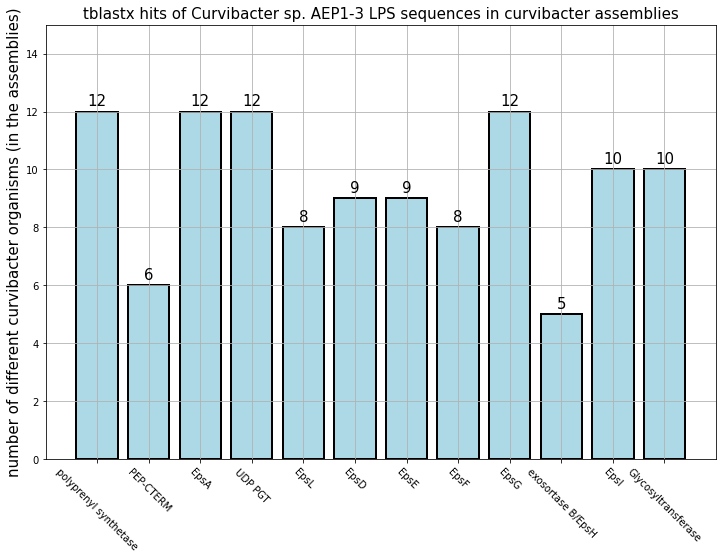

In [15]:
labels_dict = {}
labels_dict['WP_087496569.1'] = "polyprenyl synthetase"
labels_dict['WP_087496568.1'] = "PEP-CTERM"
labels_dict['WP_087496564.1'] = "EpsA"
labels_dict['WP_087496563.1'] = "UDP PGT" #"UDP glycosylphosphotransferase"
labels_dict['WP_087496562.1'] = "EpsL"
labels_dict['WP_087496561.1'] = "EpsD"
labels_dict['WP_087496560.1'] = "EpsE"
labels_dict['WP_087496559.1'] = "EpsF"
labels_dict['WP_087496558.1'] = "EpsG"
labels_dict['WP_087496557.1'] = "exosortase B/EpsH"
labels_dict['WP_087496556.1'] = "EpsI"
labels_dict['WP_087496555.1'] = "Glycosyltransferase" #"WecB/TagA/CpsF glycosyltransferase"

hits = []
queries = []
for qseqid in blast_table['qseqid'].unique():
    sub_df = blast_table[blast_table['qseqid'] == qseqid]
    unique_taxids = sub_df['staxids'].unique()
    print("[*] Found {} taxids for query sequence {}".format(len(unique_taxids),qseqid))
    hits.append(len(unique_taxids))
    print("\t[*] Setting label to: {}".format(labels_dict[qseqid]))
    queries.append(labels_dict[qseqid])
    
fsize=15
plt.figure(figsize=(12,8))
plt.bar(height=hits,x=range(len(hits)),color="lightblue", edgecolor="black", lw=2)
for height, xtick in zip(hits, range(len(hits))):
    plt.text(xtick,height+0.2,"{}".format(height),fontsize=fsize,ha='center')
plt.xticks(ticks=range(len(hits)),labels=queries, rotation=-45)
plt.ylabel("number of different curvibacter organisms (in the assemblies)", fontsize=fsize)
plt.title("tblastx hits of Curvibacter sp. AEP1-3 LPS sequences in curvibacter assemblies", fontsize=fsize)
plt.ylim(0,15)
plt.grid()

# example queries

In [ ]:
%%bash

esearch -db pubmed -query "(LPS OR lipopolysaccharides OR lipopolysaccharide) AND (transcriptional activator OR transcription factor)" |
elink -related -name pubmed_protein_refseq

In [ ]:
%%bash

esearch -db pubmed -query "(LPS OR lipopolysaccharides OR lipopolysaccharide) AND (transcriptional activator OR transcription factor)" | 
elink -target protein |
efilter -organism burkholderiales -source refseq | 
efetch -format fasta > ../data/entrez/literature_burkholderiales_lps_transcription_factors.faa

In [ ]:
%%bash

esearch -db protein -query "methionine AND Curvibacter" |
efetch -format docsum |
xtract -pattern DocumentSummary -sep "\t" -element Id Caption Title Organism 

In [ ]:
%%bash

esearch -db nucleotide -query "adh AND mus musculus" | 
efetch -format docsum -stop 1 |
xtract -pattern DocumentSummary -sep "\t" \
    -block DocumentSummary \
    -element AccessionVersion Organism Slen Title CreateDate Biomol MolType \
    -block Stat -if @type -equals Length -element @count

In [ ]:
%%bash

esearch -db geoprofiles -query "symbiosis AND lipopolysaccharide" | 
elink -target gds | 
efetch -format docsum |
xtract -pattern DocumentSummary -sep "\t" -element Id valType taxon PDAT title summary